#Mauricio Terreo

Dataset:  Hotel Booking Cancellation Prediction

Origem: https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction/code



Descrição do conjunto de dados: o dataset inclui detalhes de reservas e informações dos clientes. Estas informações foram obtidas de cenários reais de reservas de hotéis, garantindo autenticidade e relevância para modelagem preditiva. São no total 36285 linhas e 17 colunas que permitem várias análises.

Descrição das colunas:

Booking_ID	 ->	Identificador único para cada reserva

number of adults	 ->	Número de adultos incluídos na reserva

number of children	 ->	Número de crianças incluídas na reserva

number of weekend nights	 ->	Número de noites de fim de semana incluídas na reserva

number of week nights	 ->	Número de noites semanais incluídas na reserva

type of meal	 ->	Tipo de refeição incluída na reserva
car parking space	 ->	Indica se uma vaga de estacionamento foi solicitada ou incluída na reserva

room type	 ->	Tipo de quarto reservado

lead time	 ->	Número de dias entre a data da reserva e a data de chegada

market segment type	 ->	Tipo de segmento de mercado associado à reserva

repeated	 ->	Indica se a reserva é uma reserva repetida

P-C	 ->	Número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual

P-not-C	 ->	Número de reservas anteriores não canceladas pelo cliente antes da reserva atual

average price	 ->	Preço médio associado à reserva

special requests	 ->	Número de pedidos especiais feitos pelo hóspede

date of reservation	 ->	Data da reserva

booking status	 ->	Status da reserva (cancelada ou não cancelada)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Exploração dos dados:

In [3]:
df = pd.read_csv("/content/booking.csv")

In [4]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


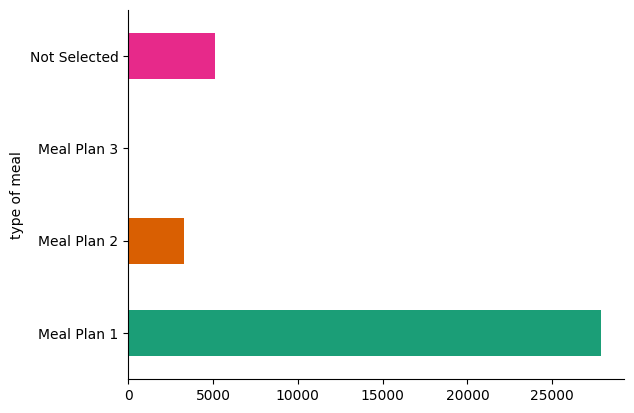

In [5]:
# @title type of meal

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type of meal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
#Para obter o número de linhas e colunas do df:
df.shape

(36285, 17)

In [7]:
#Para obter o nome das colunas e tipos de dados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Vemos que não temos null's neste dataframe.

Algumas observações:

o "Booking_ID" aparentemente é um indentificador único de cada reserva, mas é interessante verificar se esta coluna ralmente contém apenas valores únicos.

In [8]:
# Uma forma de verificar que não há valores duplicados
dd = df['Booking_ID'].duplicated()
d = 0
for x in range(dd.shape[0]):
  if dd[x] == True:
    d = d+1
print("Valores repetidos = ", d)

Valores repetidos =  0


Feito isto, verificamos esta coluna contém valores unicos, assim podemos promover esta coluna ['Booking_ID'] a índice:

In [9]:
df = df.set_index('Booking_ID')

In [10]:
df.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
Booking_ID,,,,,,,,,,,,,,,,
INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [11]:
# Estatísticas sobre os dados
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Verificação de registros nulos no dataset

Esta função exibirá a quantidade de registros únicos para cada coluna existente no dataset e faz a visualização do dataframe na forma de um Histograma.

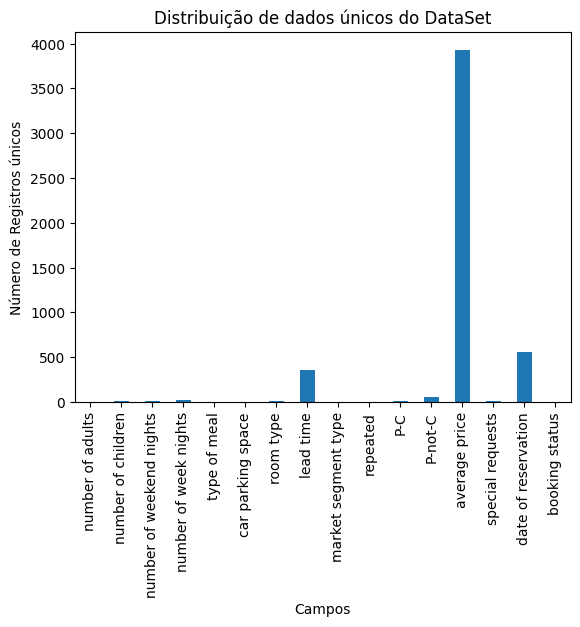

In [12]:
def distribuicao (data):

  # Calculando valores unicos para cada label: num_unique_labels
  num_unique_labels = data.apply(pd.Series.nunique)

  # plotando valores
  num_unique_labels.plot( kind='bar')

  # Nomeando os eixos
  plt.xlabel('Campos')
  plt.ylabel('Número de Registros únicos')
  plt.title('Distribuição de dados únicos do DataSet')

  # Exibindo gráfico
  plt.show()

distribuicao(df)

Podemos excluir as colunas com valores "contínuos"

In [13]:
df_distr = df.drop(columns=['lead time', 'average price', 'date of reservation'])

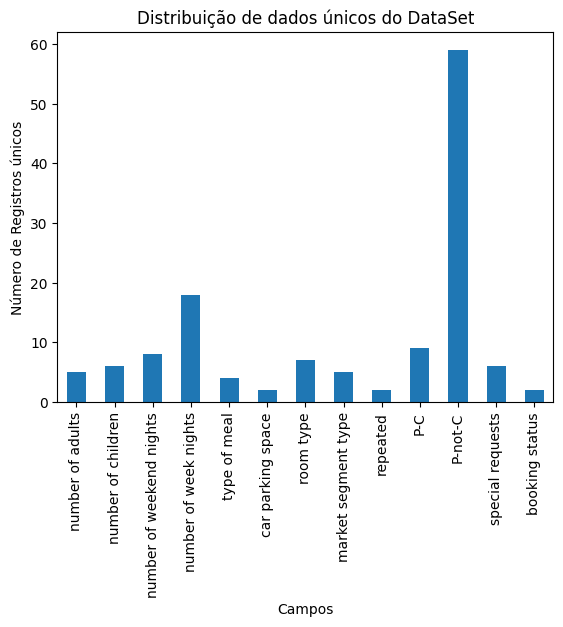

In [14]:
distribuicao(df_distr)

Transformando as colunas categóricas em dummies:

Nota: para colocar este modelo em produção é recomendável acrescentrar uma coluna "outros" para cada colunas onde é feita a "dummização", exceto na coluna 'booking status' que será o valor predito no modelo. Também precisa de fazer a transformação do valor em '1' na coluna dummy do valor e '0' nas demais.

In [15]:
colunas_to_dummy = ['type of meal', 'room type', 'market segment type', 'booking status']

In [16]:
for coluna in colunas_to_dummy:
  df_dum = pd.get_dummies(df[coluna])
  df = pd.merge(df, df_dum, how = 'inner', on = 'Booking_ID')
  df = df.drop(columns=[coluna])

df.head(3)

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online,Canceled,Not_Canceled
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,True,False,False,True
INN00002,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,True,False,True
INN00003,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,True,True,False


Dado que a coluna 'Not_Canceled' é complementar a coluna 'Canceled', podemos excluir a coluna 'Not_Canceled':

In [17]:
df = df.drop(columns=['Not_Canceled'])

Vamos excluir tmb a coluna 'date of reservation', uma alternativa seria transforma-la por exemplo em uma coluna "Dia se semana", se a reserva fosse feita em um dia de semana teria o valor True, caso contrario o valor False.

In [18]:
df = df.drop(columns=['date of reservation'])

In [19]:
df.head(3)

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online,Canceled
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,1,1,2,5,0,224,0,0,0,88.00,...,False,False,False,False,False,False,False,True,False,False
INN00002,1,0,1,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,True,False
INN00003,2,1,1,3,0,1,0,0,0,50.00,...,False,False,False,False,False,False,False,False,True,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36285 entries, INN00001 to INN36286
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   car parking space         36285 non-null  int64  
 5   lead time                 36285 non-null  int64  
 6   repeated                  36285 non-null  int64  
 7   P-C                       36285 non-null  int64  
 8   P-not-C                   36285 non-null  int64  
 9   average price             36285 non-null  float64
 10  special requests          36285 non-null  int64  
 11  Meal Plan 1               36285 non-null  bool   
 12  Meal Plan 2               36285 non-null  bool   
 13  Meal Plan 3               36285 non-null  bool   
 14  N

Podemos usar um mapa de calor para mostrar a relação linear entre as variáveis de um conjunto de dados. Esta visualização coloca as variáveis em um eixo X e um eixo Y, indicando (dentro de um quadrado) a correlação entre elas. O valor da correlação varia de -1 até 1.

Valor positivo: indica que as variáveis seguem para a mesma direção. Por exemplo, quando mais tempo um carro anda a velocidade constante, maior a distância que ele percorre.

Valor negativo: indica que as variáveis estão em direções opostas. Por exemplo, quando maior a velocidade, menor é o tempo para percorrer um determinado percurso.

A cor do mapa de calor auxilia na visualização dos dados. No gráfico abaixo foi utilizada a grade de cores “coolwarm”, que mostra quanto mais negativa a correlação, mais azul fica, e quando mais positiva a correlação mais vermelho fica.


<Axes: >

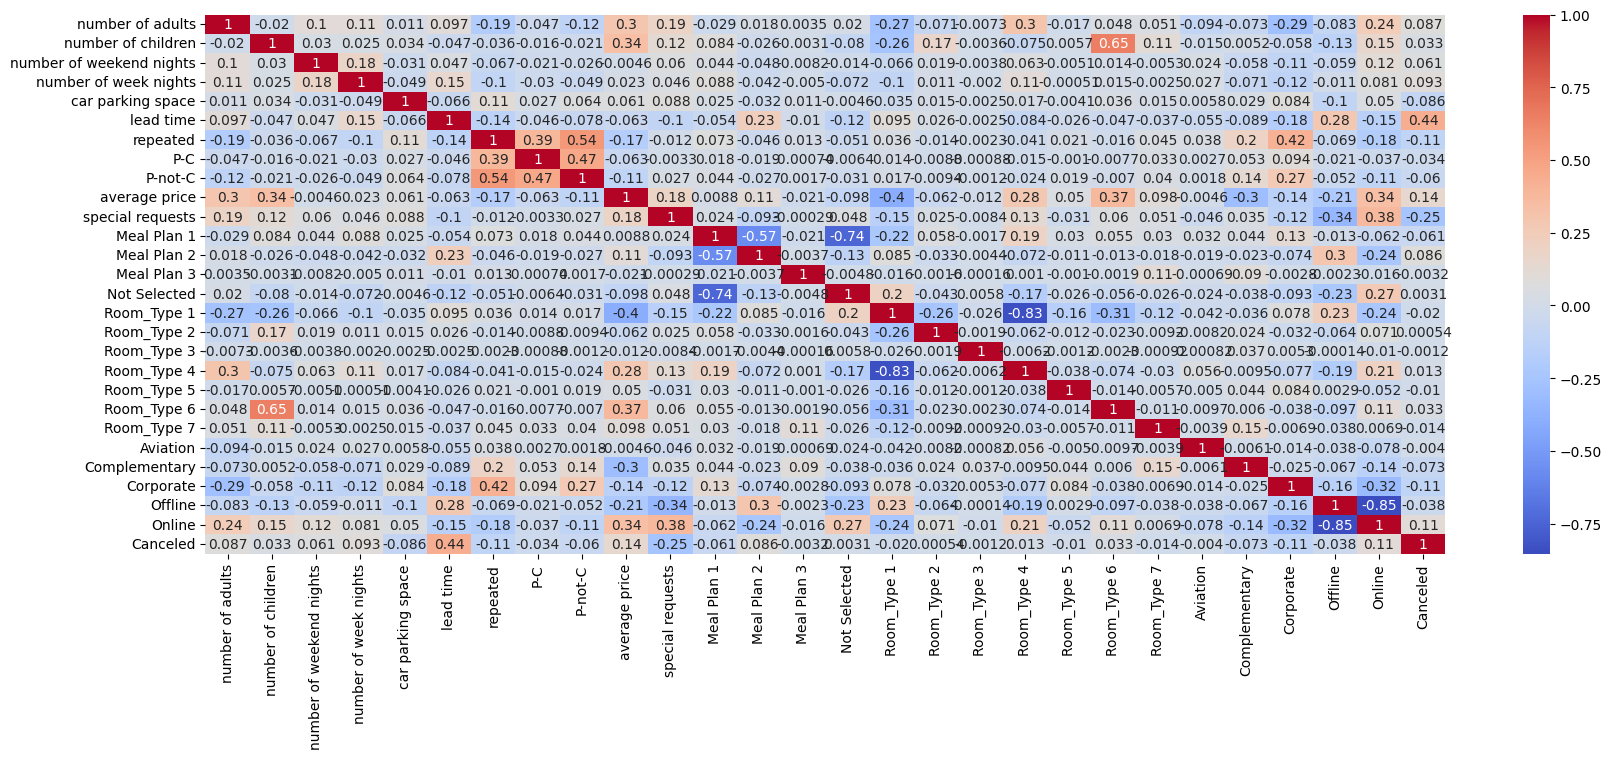

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Note que nenhuma das váriaveis possui correlação forte com o coluna "Canceled".

#Separção do dataset em treino e teste

Split do conjunto de dados

In [22]:
# X =  colunas de informação, variáveis independentes
X = df.drop('Canceled', axis=1)

# y = Variável dependente, a qual será utilizada para classificar os dados
y = df['Canceled']

Train Test Split

Nesta fase separamos o conjunto de dados em Treinamento e Teste, definindo o percentual que utilizaremos para teste e para treino do modelo

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [24]:
scores = {}

#Aplicação do algoritmo de KNNs




Feature Scaling

Etapa importante que irá reduzir a escala numérica das colunas, para que todas estejam dentro de uma mesma escala de valor, lembrando que na matemática os números são infinitos dentro de suas escalas, podendo serem representados então em diversas escalas diferentes. Se houverem medidas com escalas de valor muito diferentes a distância calculada pelo algorítimo será influênciada podendo gerar resultados errôneos.

In [25]:
#Importing librarie
from sklearn.preprocessing import StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Creating KNN Model

Agora iremos aplicar nossos dados ao algoritmo KNN

In [27]:
#Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Definindo o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=5)

#Treinando o modelo, com dados de treinamento
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
#### Prevendo os valores de Y para os dados de teste (X_test)
y_pred = classifier.predict(X_test)

Avaliando o Algoritmo

Analisando e validando os resultados obtidos

In [29]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))

scores["KNN"] = accuracy_score(y_test, y_pred)

# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , scores["KNN"])

Matriz Confusa: 
[[6631  715]
 [ 975 2565]] 

Relatório de classificação: 
               precision    recall  f1-score   support

       False       0.87      0.90      0.89      7346
        True       0.78      0.72      0.75      3540

    accuracy                           0.84     10886
   macro avg       0.83      0.81      0.82     10886
weighted avg       0.84      0.84      0.84     10886

Acurácia do modelo:  0.8447547308469594


Loop para gerar testes com diferentes valores de visinho (K)

In [30]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Comparando o Error Rate gerado de valores K diferentes

Text(0, 0.5, 'Mean Error')

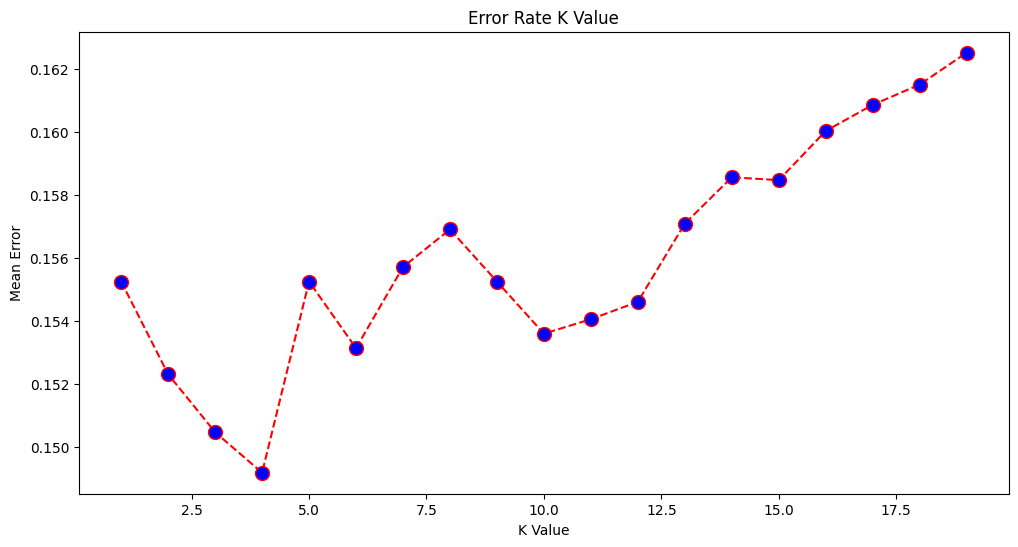

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Assim obtemos de forma visual qual o melhor parâmetro K para o nosso modelo.

Aplicando melhor parâmetro para K encontrado:

In [32]:
# Treinando o modelo KNN com o melhor parâmetro para K

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# Aplicando os valores de teste novamente
y_pred = classifier.predict(X_test)

In [34]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))

scores["KNN"] = accuracy_score(y_test, y_pred)

# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , scores["KNN"])

Matriz Confusa: 
[[6634  712]
 [ 926 2614]] 

Relatório de classificação: 
               precision    recall  f1-score   support

       False       0.88      0.90      0.89      7346
        True       0.79      0.74      0.76      3540

    accuracy                           0.85     10886
   macro avg       0.83      0.82      0.83     10886
weighted avg       0.85      0.85      0.85     10886

Acurácia do modelo:  0.8495315083593606


#Aplicação do algoritmo de RandomForests

O uso do RandomForestClassifier

O RandomForest é um meta-estimador que permite ajustar vários classificadores de “decision tree” em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo.

O RandomForest usa a melhor estratégia de divisão, ou seja, equivalente a passar splitter="best" para o DecisionTreeRegressor subjacente. O tamanho da subamostra é controlado com o parâmetro max_samples, se bootstrap=True (padrão), caso contrário, todo o conjunto de dados é usado para construir cada “decision tree”.


In [35]:
# training
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rfc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy score with RandomForestClassifier is {rfc_score}")

Accuracy score with RandomForestClassifier is 0.8841631453242697


Teste com o parametro bootstrap=False

In [36]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(bootstrap=False))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rfc_score = accuracy_score(y_test, y_pred)

print(f"Accuracy score with RandomForestClassifier is {rfc_score}")

Accuracy score with RandomForestClassifier is 0.8794782289178762


In [37]:
scores["RFC"] = 0

Buscando o melhor número de amostras para o modelo:

In [38]:
for n in [1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 15000, 16000, 18000, 20000, 25000 ]:
  pipe = Pipeline([
      ("scaler", StandardScaler()),
      ("classifier", RandomForestClassifier(max_samples=n))
  ])

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  rfc_score = accuracy_score(y_test, y_pred)

  if rfc_score > scores["RFC"]:
    scores["RFC"] = rfc_score

  print(f"Accuracy score with RandomForestClassifier with {n} samples is {rfc_score}")

Accuracy score with RandomForestClassifier with 1000 samples is 0.8665258129707881
Accuracy score with RandomForestClassifier with 2000 samples is 0.8724967848612897
Accuracy score with RandomForestClassifier with 4000 samples is 0.8789270622818298
Accuracy score with RandomForestClassifier with 6000 samples is 0.8841631453242697
Accuracy score with RandomForestClassifier with 8000 samples is 0.8825096454161309
Accuracy score with RandomForestClassifier with 10000 samples is 0.8848061730663237
Accuracy score with RandomForestClassifier with 12000 samples is 0.8861840896564395
Accuracy score with RandomForestClassifier with 14000 samples is 0.8851736174903546
Accuracy score with RandomForestClassifier with 15000 samples is 0.8863678118684549
Accuracy score with RandomForestClassifier with 16000 samples is 0.8873782840345398
Accuracy score with RandomForestClassifier with 18000 samples is 0.8872864229285321
Accuracy score with RandomForestClassifier with 20000 samples is 0.88535733970237

Note que em ~16000 amostras temos a melhor acuracia.

#Otimização de hiperparâmetros

In [39]:
### Otimização de Hiperparâmetros

# Definindo variável seed
SEED = 123456

#### Carregando o algoritmo de Árvores de Decisão para ser o algoritmo na qual vamos aplicar a otimização
# Carregando as bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Criando o modelo
modelo_tree = DecisionTreeClassifier()

# Aplicando a técnica de cross validade
results = cross_validate(modelo_tree, X, y, cv=5,
               scoring=('accuracy'),
               return_train_score=True)
print(f"mean_train_score {np.mean(results['train_score']):.2f}")
print(f"mean_test_score {np.mean(results['test_score']):.2f}")

#### Abordando o uso da otimização através do Grid Search
# Carregando a biblioteca GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros
relacao_parametros = {
  "max_depth" : [3, 5],
  "min_samples_split" : [32, 64, 128],
  "min_samples_leaf" : [32, 64, 128],
  "criterion" : ["gini", "entropy"]
}

# Criando modelo
modelo_tree = DecisionTreeClassifier()

# Aplicando o algoritmo com parâmetros definidos anteriormente
clf = GridSearchCV(modelo_tree, relacao_parametros, cv=5, return_train_score=True, scoring='accuracy')

# Treinando o modelo
search = clf.fit(X, y)

# Capturando os resultados e os índices dos melhores parâmetros
results_GridSearchCV = search.cv_results_
indice_melhores_parametros = search.best_index_

# Apresentando a média de score de treino e teste produzida
print(f"mean_train_score {results_GridSearchCV['mean_train_score'][indice_melhores_parametros]:.2f}")
print(f"mean_test_score {results_GridSearchCV['mean_test_score'][indice_melhores_parametros]:.2f}")

# Apresentação dos parâmetros
results_GridSearchCV['params'][indice_melhores_parametros]

#### Abordando o uso da otimização através do Random Search
# Carregando as variáveis
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definindo relação de parâmetros
relacao_parametros_2 = {
    "max_depth" : randint(1, 10),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "criterion" : ["gini", "entropy"]
}

# Criação do modelo
modelo_tree = DecisionTreeClassifier()

clf = RandomizedSearchCV(modelo_tree, relacao_parametros_2, random_state=SEED, cv=5, return_train_score=True, n_iter=10, scoring='accuracy')
search = clf.fit(X, y)
results_RandomizedSearchCV = search.cv_results_
indice_melhores_parametros = search.best_index_

# Apresentando a média de score de treino e teste produzida
print(f"mean_train_score {results_RandomizedSearchCV['mean_train_score'][indice_melhores_parametros]:.2f}")
print(f"mean_test_score {results_RandomizedSearchCV['mean_test_score'][indice_melhores_parametros]:.2f}")

# Apresentação dos parâmetros
results_RandomizedSearchCV['params'][indice_melhores_parametros]

mean_train_score 0.99
mean_test_score 0.86
mean_train_score 0.83
mean_test_score 0.83
mean_train_score 0.84
mean_test_score 0.84


{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 66,
 'min_samples_split': 46}

Comparando os modelos:

In [40]:
for model, score in scores.items():
    print(f"Accuracy score model {model}: {score:.4f}")

Accuracy score model KNN: 0.8495
Accuracy score model RFC: 0.8874


O modelo RFC forneceu resultados ligeiramente melhores.